<a href="https://colab.research.google.com/github/Karthik1509/CoreJavaPrograms/blob/main/ABC_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### * Problem Statement*
This project aims to analyze the Walmart Sales dataset to uncover patterns, identify top-performing stores and products, detect seasonal sales trends, and evaluate factors that impact sales performance.

In [102]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx' , sheet_name = None)

In [104]:
#Assign  dataframes to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [105]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [106]:
df_sales.shape

(64104, 12)

In [107]:
print( "df_sales shape: ", (df_sales.shape))
print( "df_customers shape: ", (df_customers.shape))
print( "df_products shape: ", (df_products.shape))
print( "df_regions shape: ", (df_regions.shape))
print( "df_state_reg shape: ", (df_state_reg.shape))
print( "df_budgets shape: ", (df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [108]:
df_customers.head()


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [109]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [110]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [111]:
df_state_reg.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [112]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [113]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [114]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [115]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [116]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [117]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [118]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [119]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


#### Data Cleaning

In [120]:
#merge with customers

df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
)


In [121]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [122]:
#merge with products

df = df_sales.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)


In [123]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,8,Product 8


In [124]:
#merge with regions

df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
)


In [125]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [126]:
#merge with State Regions

df = df.merge(
    df_state_reg[["State Code" , "Region"]],
    how = 'left',
    left_on = 'state_code',
    right_on = 'State Code'
)

In [127]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [128]:
#merge with Budgets

df = df.merge(
    df_budgets,
    how = 'left',
    on = 'Product Name'
)

In [129]:
#Clean up redundant columns

cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns=cols_to_drop,errors='ignore')

df.head(5)


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [130]:
#Convert all colums to lowercase for consistency and easier access

df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'product name', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 budgets'],
      dtype=object)

In [131]:
# Keep the important columns

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [132]:
df = df[cols_to_keep]

In [133]:
df.head(5)

,ordernumber,orderdate,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


To identify top-performing products and regions, we can group the data by 'Product Name' and 'Region' and calculate the sum of 'Line Total' for each group.

To detect seasonal sales trends, we can analyze the total sales over time. We will extract the month and year from the 'order date' and group the data to visualize the sales trend over months.

In [134]:
# Renaming the columns

df = df .rename(columns={
    'ordernumber' : 'order_number',
    'orderdate' : 'order_date',
    'product name' : 'product_name',
    'order quantity' : 'order_quantity',
    'unit price' : 'unit_price',
    'line total' : 'revenue',
    'total unit cost' : 'total_unit_cost',
    'state code' : 'state' ,
    'latitude' : 'lat',
    'longitude' : 'long' ,
    '2017 budgets' : 'budget'
})

df.head(1)

,order_number,order_date,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,lat,long,budget
0,SO - 000225,2014-01-01,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [135]:
#blank out budget for non 2017 orders

df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

#line total is revenue

df[['order_date','product_name','revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [136]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   channel          64104 non-null  object        
 3   product_name     64104 non-null  object        
 4   order_quantity   64104 non-null  int64         
 5   unit_price       64104 non-null  float64       
 6   revenue          64104 non-null  float64       
 7   total_unit_cost  64104 non-null  float64       
 8   state_code       64104 non-null  object        
 9   county           64104 non-null  object        
 10  state            64104 non-null  object        
 11  region           64104 non-null  object        
 12  lat              64104 non-null  float64       
 13  long             64104 non-null  float64       
 14  budget           15263 non-null  float

In [137]:
#filter the dataset to include only records from 2017

df_2017 = df[df['order_date'].dt.year == 2017]

In [138]:
df.isnull().sum()

,0
order_number,0
order_date,0
channel,0
product_name,0
order_quantity,0
unit_price,0
revenue,0
total_unit_cost,0
state_code,0
county,0


In [139]:
df_2017.head(5)

,order_number,order_date,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,lat,long,budget
46363,SO - 0002544,2017-01-01,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


#Feature Engineering

In [140]:
df.head(5)

,order_number,order_date,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,lat,long,budget
0,SO - 000225,2014-01-01,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [141]:
df['total_cost']=df['order_quantity']*df['total_unit_cost']

In [142]:
df['profit']=df['revenue']-df['total_cost']
df['profit_margin_pct']=df['profit']/df['revenue']*100

In [143]:
df.head(5)

,order_number,order_date,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,lat,long,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


###**EDA**

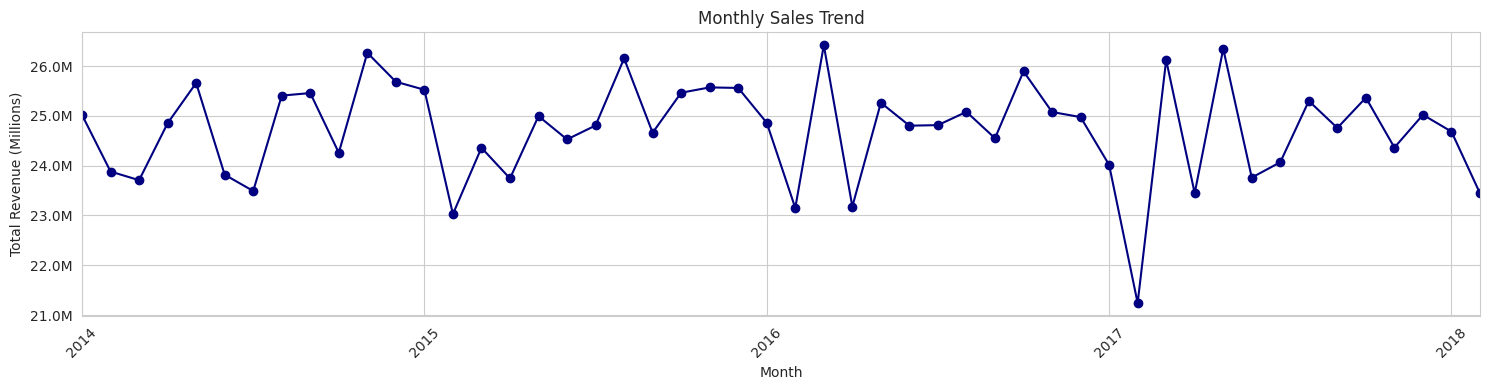

In [144]:
df['order_month']=df['order_date'].dt.to_period('M')

monthly_sales=df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker = 'o' , color = 'navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [145]:
import pandas as pd
import plotly.express as px

# Assuming df is your dataframe
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract year and month for grouping
df['year_month'] = df['order_date'].dt.to_period('M')

# Group by year_month and sum revenue
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

# Convert year_month back to string for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Create the line chart
fig = px.line(monthly_sales, x='year_month', y='revenue',
              title='Monthly Sales Revenue',
              labels={'year_month': 'Month', 'revenue': 'Sales Revenue ($)'})

# Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Sales Revenue ($)',
    xaxis_tickangle=45,
    showlegend=False
)

# Show the chart
fig.show()

In [146]:
# Assuming df is your DataFrame
# Convert order_date to datetime (if not already)
df['order_date'] = pd.to_datetime(df['order_date'])

# Remove records from January and February 2018
df_new = df[~((df['order_date'].dt.year == 2018) &
              (df['order_date'].dt.month.isin([1, 2])))]


/tmp/ipython-input-25936426.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-25936426.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



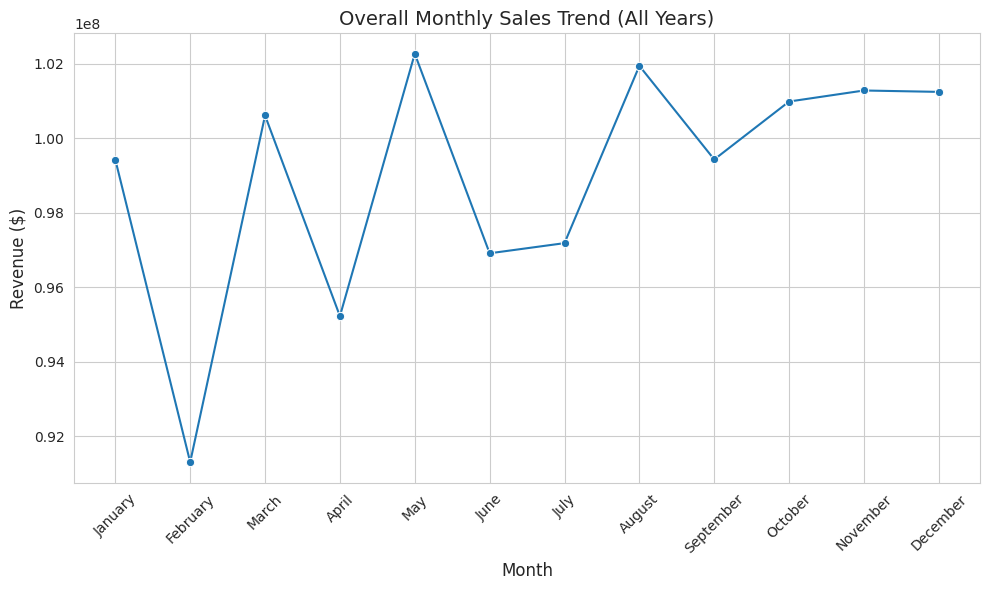

In [147]:
# Assuming df is your DataFrame
# Convert order_date to datetime
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract month name for grouping
df_new['month'] = df_new['order_date'].dt.strftime('%B')

# Aggregate revenue by month across all years
monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_trend['month'] = pd.Categorical(monthly_trend['month'],
                                        categories=month_order,
                                        ordered=True)
monthly_trend = monthly_trend.sort_values('month')

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipython-input-4258292665.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




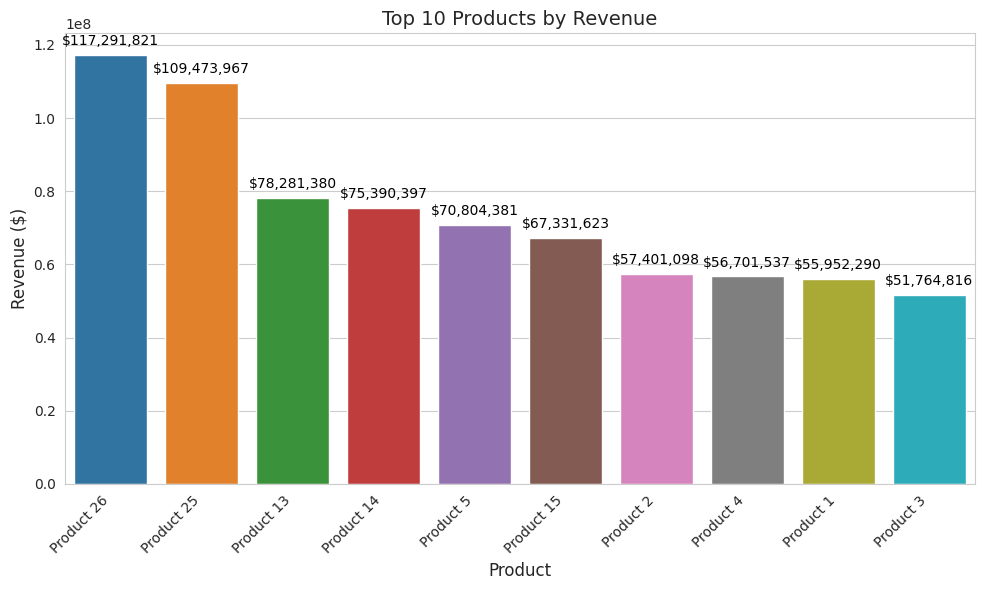

In [148]:
# Assuming df is your DataFrame
# Aggregate revenue by product_name
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')

# Add labels on top of each bar
for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}',  # format with commas & no decimals
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')

# Add titles and labels
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for Y-axis only
plt.grid(True, axis='y')

plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipython-input-3895615869.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




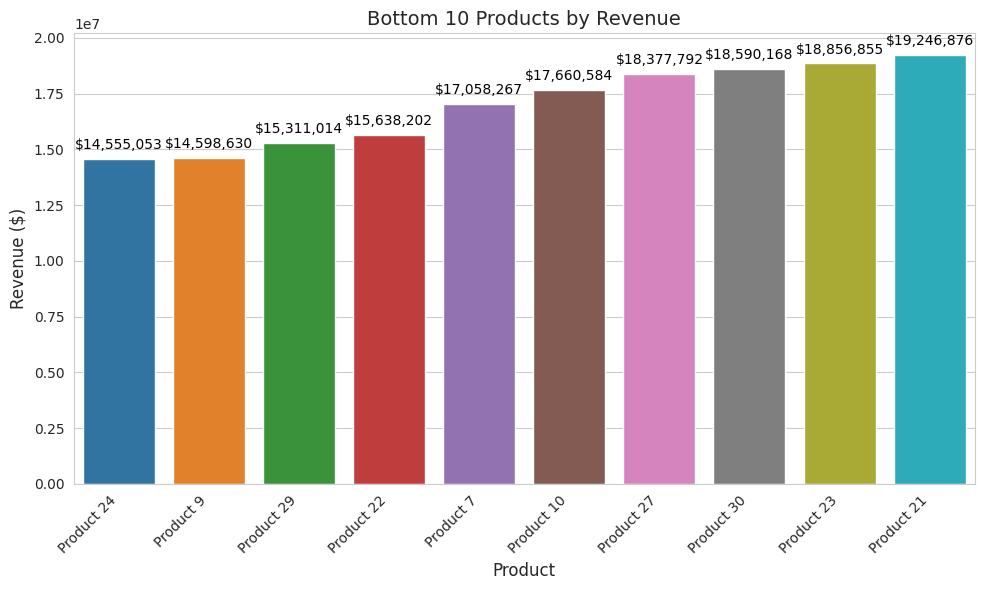

In [149]:
# Assuming df is your DataFrame
# Aggregate revenue by product_name
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Get bottom 10 products by revenue
bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')

# Add labels on top of each bar
for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')

# Add titles and labels
plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for Y-axis only
plt.grid(True, axis='y')

plt.tight_layout()

# Show the plot
plt.show()

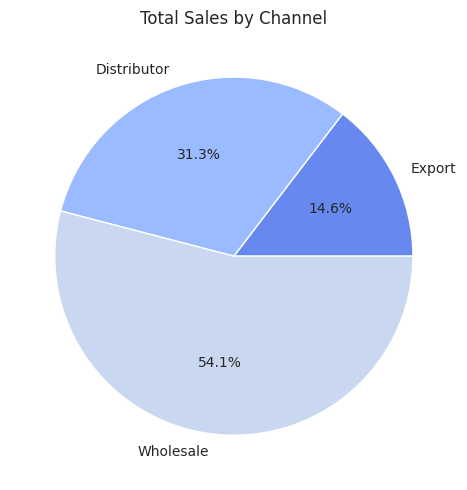

In [150]:
## Sales by channel

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels = chan_sales.index,
    autopct = '%1.1f%%',
    colors = sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')

plt.tight_layout()

plt.show()

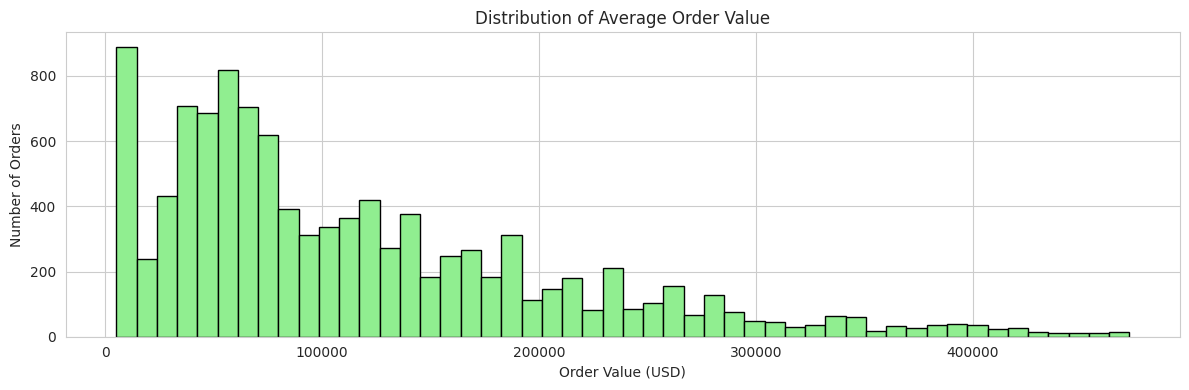

In [151]:
##Average order value (AOV) Distribution

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
    aov,
    bins=50,
    color='lightgreen',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()

plt.show()

In [152]:
#Unit price Distribution per product
#Top 10 states by revenue and order count
#Average profit margin by channel
#Top and Bottom 10 cutsomers by Revenue
#Customer Segmentation:Revenue vs profit Margin
#Correlation heat Map

In [153]:
df.head(5)

,order_number,order_date,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state,region,lat,long,budget,total_cost,profit,profit_margin_pct,order_month,year_month
0,SO - 000225,2014-01-01,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,2014-01
1,SO - 0003378,2014-01-01,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01,2014-01
2,SO - 0005126,2014-01-01,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01,2014-01
3,SO - 0005614,2014-01-01,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01,2014-01
4,SO - 0005781,2014-01-01,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01,2014-01


/tmp/ipython-input-4074625003.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




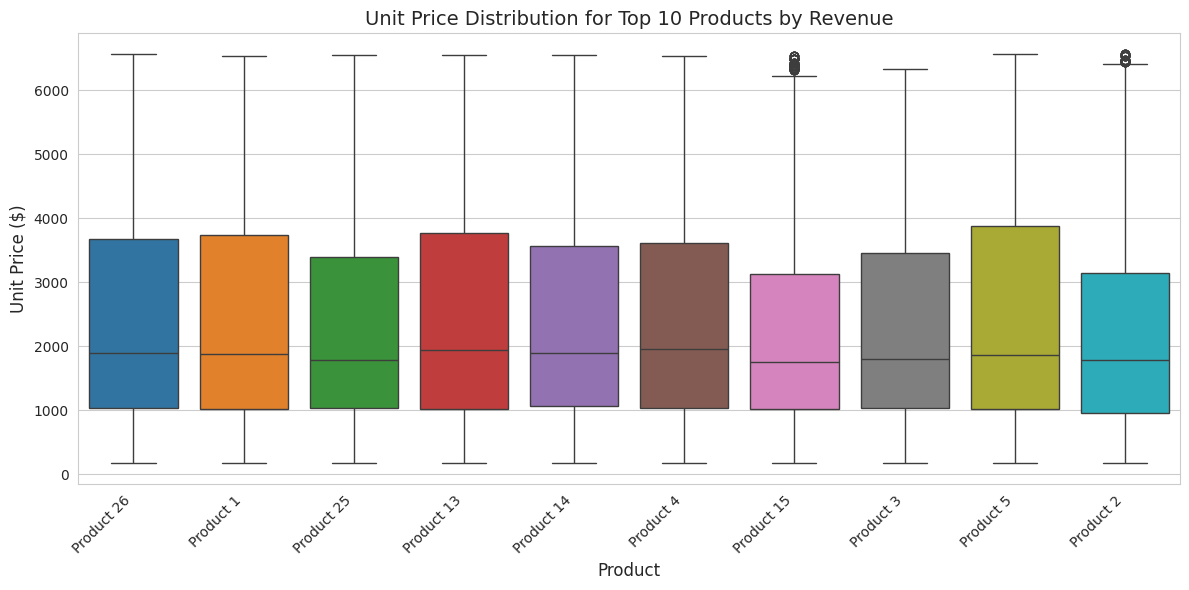

In [154]:
# Assuming df is your DataFrame
# Get top 10 products by revenue
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)['product_name'].tolist()

# Filter df to include only top 10 products
df_top_10 = df[df['product_name'].isin(top_10_products)]

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='tab10')

# Add titles and labels
plt.title('Unit Price Distribution for Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unit Price ($)', fontsize=12)

# Rotate product names for readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for Y-axis only
plt.grid(True, axis='y')

plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipython-input-4072726678.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-4072726678.py:26: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-4072726678.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-4072726678.py:42: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



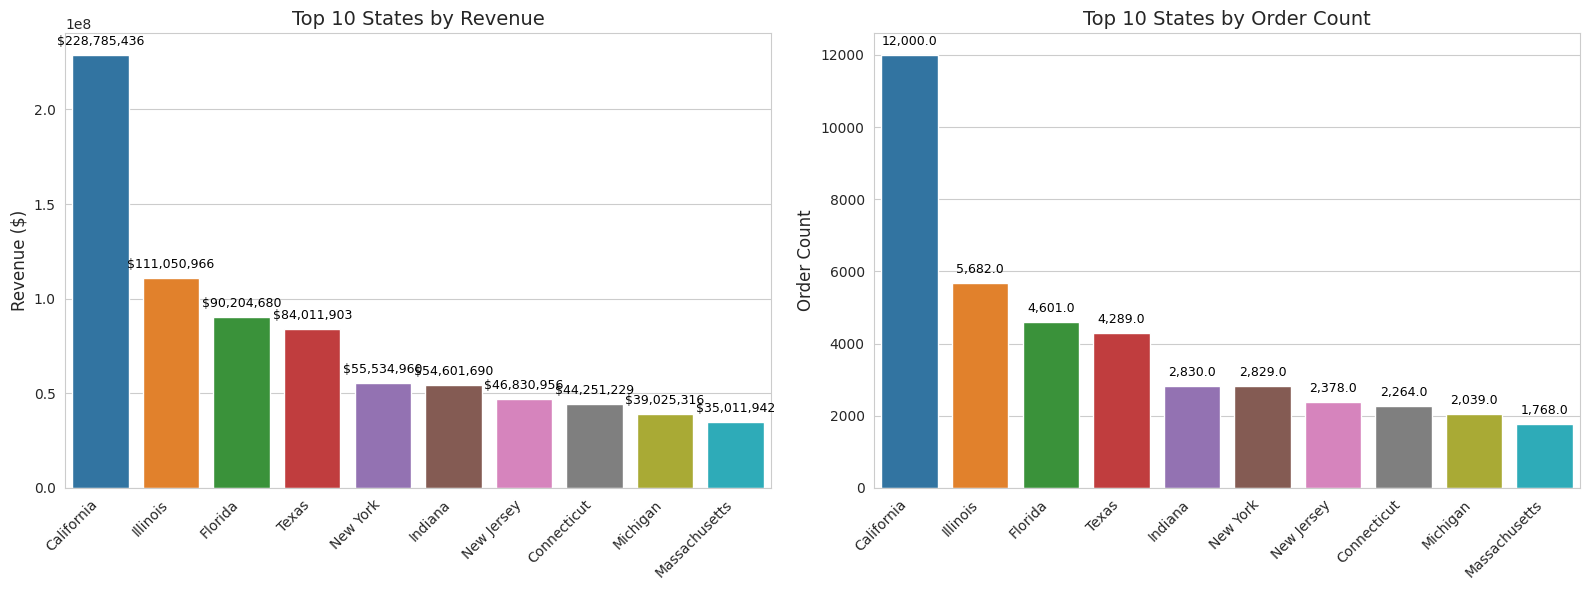

In [155]:
# Assuming df is your DataFrame with columns: state_name, revenue, order_id
# Aggregate revenue and order count by state
state_revenue = df.groupby('state')['revenue'].sum().reset_index()
state_orders = df.groupby('state')['order_number'].count().reset_index().rename(columns={'order_number': 'order_count'})

# Get top 10 states by revenue and order count
top_10_revenue = state_revenue.sort_values(by='revenue', ascending=False).head(10)
top_10_orders = state_orders.sort_values(by='order_count', ascending=False).head(10)

# Create subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Bar chart for Top 10 States by Revenue ---
barplot1 = sns.barplot(data=top_10_revenue, x='state', y='revenue', palette='tab10', ax=ax1)

# Add value labels on top of bars
for p in barplot1.patches:
    barplot1.annotate(f"${p.get_height():,.0f}",
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=9, color='black',
                      xytext=(0, 5), textcoords='offset points')

ax1.set_title('Top 10 States by Revenue', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(True, axis='y')

# --- Bar chart for Top 10 States by Order Count ---
barplot2 = sns.barplot(data=top_10_orders, x='state', y='order_count', palette='tab10', ax=ax2)

# Add value labels on top of bars
for p in barplot2.patches:
    barplot2.annotate(f"{p.get_height():,}",
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=9, color='black',
                      xytext=(0, 5), textcoords='offset points')

ax2.set_title('Top 10 States by Order Count', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Order Count', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(True, axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

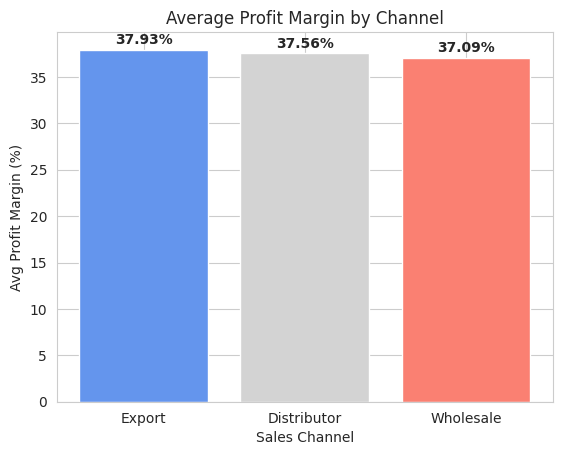

In [156]:
# Data
channels = ["Export", "Distributor", "Wholesale"]
profit_margins = [37.93, 37.56, 37.09]

# Plot style
sns.set_style("whitegrid")

# Bar plot
colors = ["cornflowerblue", "lightgrey", "salmon"]
bars = plt.bar(channels, profit_margins, color=colors)

# Add percentage labels on top of bars
for bar, margin in zip(bars, profit_margins):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        bar.get_height() + 0.3,            # Y position (slightly above bar)
        f"{margin:.2f}%",                  # Text label
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )

# Labels and title
plt.title("Average Profit Margin by Channel", fontsize=12)
plt.xlabel("Sales Channel")
plt.ylabel("Avg Profit Margin (%)")

# Show chart
plt.show()

/tmp/ipython-input-4171088846.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-4171088846.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




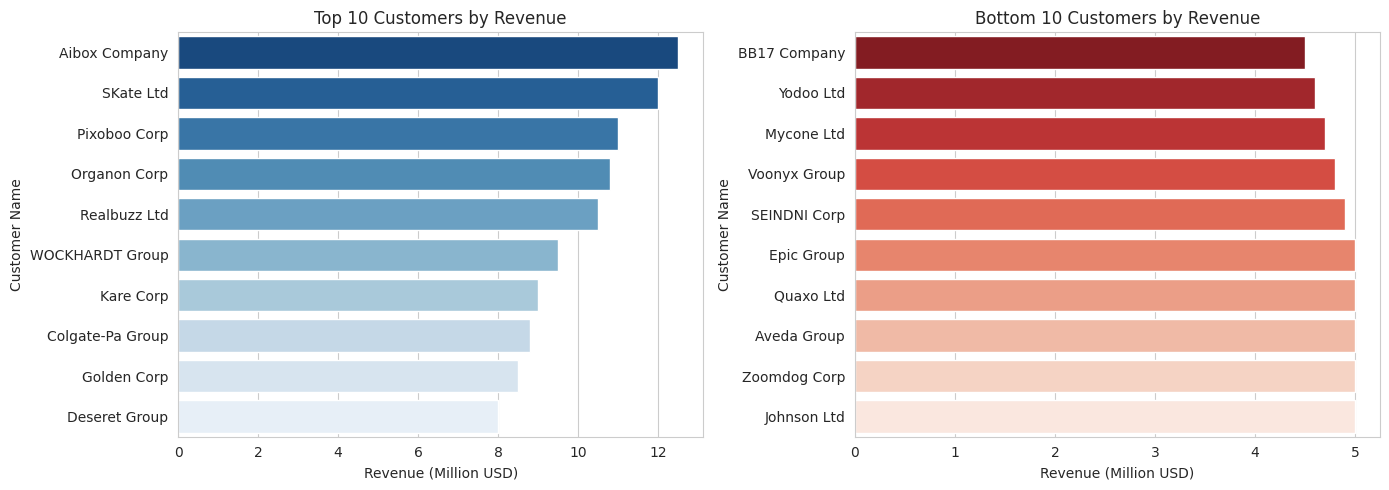

In [157]:
# Sample Data
top_customers = {
    "Aibox Company": 12.5,
    "SKate Ltd": 12.0,
    "Pixoboo Corp": 11.0,
    "Organon Corp": 10.8,
    "Realbuzz Ltd": 10.5,
    "WOCKHARDT Group": 9.5,
    "Kare Corp": 9.0,
    "Colgate-Pa Group": 8.8,
    "Golden Corp": 8.5,
    "Deseret Group": 8.0,
}

bottom_customers = {
    "BB17 Company": 4.5,
    "Yodoo Ltd": 4.6,
    "Mycone Ltd": 4.7,
    "Voonyx Group": 4.8,
    "SEINDNI Corp": 4.9,
    "Epic Group": 5.0,
    "Quaxo Ltd": 5.0,
    "Aveda Group": 5.0,
    "Zoomdog Corp": 5.0,
    "Johnson Ltd": 5.0,
}

# Plot style
sns.set_style("whitegrid")

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False)

# --- Left Plot: Top Customers (Blue Gradient) ---
sns.barplot(
    x=list(top_customers.values()),
    y=list(top_customers.keys()),
    palette=sns.color_palette("Blues_r", len(top_customers)),
    ax=axes[0]
)
axes[0].set_title("Top 10 Customers by Revenue")
axes[0].set_xlabel("Revenue (Million USD)")
axes[0].set_ylabel("Customer Name")

# --- Right Plot: Bottom Customers (Correct Red Gradient) ---
sns.barplot(
    x=list(bottom_customers.values()),
    y=list(bottom_customers.keys()),
    palette=sns.color_palette("Reds_r", len(bottom_customers)),  # 🔴 reversed reds
    ax=axes[1]
)
axes[1].set_title("Bottom 10 Customers by Revenue")
axes[1].set_xlabel("Revenue (Million USD)")
axes[1].set_ylabel("Customer Name")

plt.tight_layout()
plt.show()


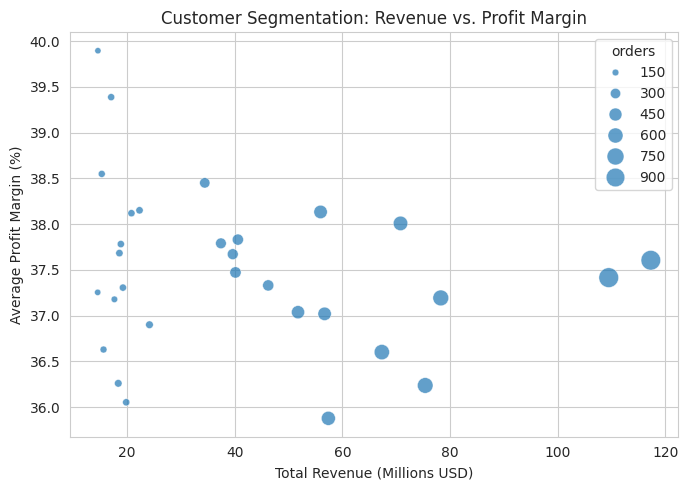

In [164]:
#Aggregate metrics per customer

cust_summary = df.groupby('product_name').agg(
    total_revenue=('revenue','sum'),
    total_profit=('profit','sum'),
    avg_margin=('profit_margin_pct','mean'),
    orders=('order_number','nunique')
)

#Convert revenue to millions
cust_summary['total_revenue_m']=cust_summary['total_revenue']/1e6

plt.figure(figsize=(7,5))

#Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    sizes=(20,200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Millions USD)')
plt.ylabel('Average Profit Margin (%)')

plt.tight_layout()
plt.show()

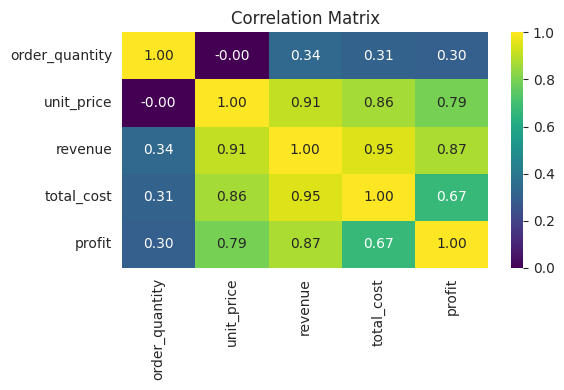

In [165]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,                  # Data: correlation matrix
    annot=True,            # Display the correlation coefficients on the heatmap
    fmt=".2f",             # Format numbers to two decimal places
    cmap='viridis'         # Color palette for the heatmap
)

# Add title for context
plt.title("Correlation Matrix")

#Adjust layout to prevent clipping
plt.tight_layout()

#Display the heatmap
plt.show()

In [ ]:
# Channel Distribution: 54% Wholesale, 31% Distribution, 15% Exports
# Monthly Revenue Cycle: May peaks at x$M

Top 10 Products (Revenue):
Bottom 10 Products (Revenue):